In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [213]:
df = pd.read_csv('cs-training.csv', index_col='Unnamed: 0')
df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [214]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [215]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [216]:
RevolvingUtilizationOfUnsecuredLines_median = df[df.RevolvingUtilizationOfUnsecuredLines <= df.RevolvingUtilizationOfUnsecuredLines.quantile(0.994)].RevolvingUtilizationOfUnsecuredLines.median()
df.loc[df.RevolvingUtilizationOfUnsecuredLines >= df.RevolvingUtilizationOfUnsecuredLines.quantile(0.994), 'RevolvingUtilizationOfUnsecuredLines'] = RevolvingUtilizationOfUnsecuredLines_median

df.loc[df.age < 16, 'age'] = df.age.median()
df.loc[df.DebtRatio > df.DebtRatio.quantile(0.75), 'DebtRatio'] = df.DebtRatio.median()

<AxesSubplot:>

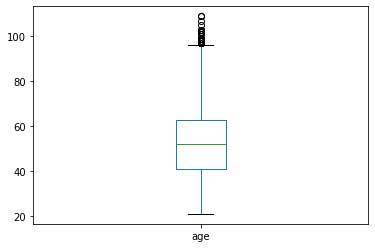

In [217]:
df.age.plot.box()

In [218]:
df.isnull().mean() * 100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [235]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

AUC score: 86.07982811323184


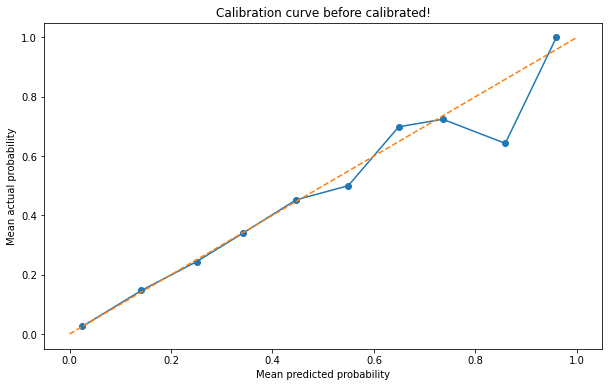

In [241]:
numeric_features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# categorical_features = ['embarked', 'sex', 'pclass']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
random_forest = RandomForestClassifier(n_estimators=200, 
                            max_depth=5, 
                            min_samples_split=100,
                            min_samples_leaf=100, 
                            n_jobs=8)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(random_forest, cv=5, method='isotonic'))
                      ])

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SeriousDlqin2yrs'), df['SeriousDlqin2yrs'], test_size=0.2,
                                                    random_state=0, stratify=df['SeriousDlqin2yrs'])

clf.fit(X_train, y_train)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100


print(f"AUC score: {auc}")

y_predicted = clf.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Mean actual probability')
plt.title('Calibration curve before calibrated!')
plt.show()

model score: 60.484605308925666


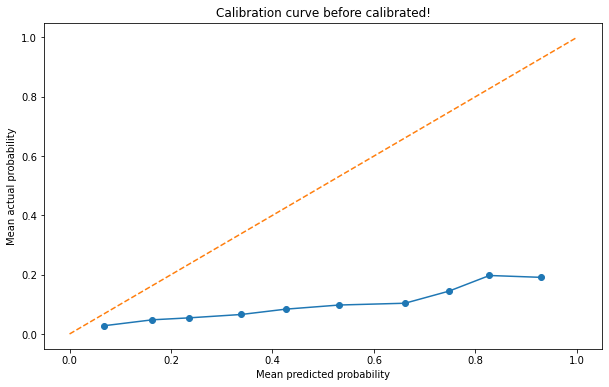

In [141]:
numeric_features = ['MonthlyIncome', 'NumberOfDependents']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# categorical_features = ['embarked', 'sex', 'pclass']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=200, 
                                                            max_depth=5, 
                                                            min_samples_split=100,
                                                            min_samples_leaf=100, 
                                                            n_jobs=8))])

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SeriousDlqin2yrs'), df['SeriousDlqin2yrs'], test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100


print(f"model score: {auc}")

y_predicted = clf.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Mean actual probability')
plt.title('Calibration curve before calibrated!')
plt.show()

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

AUC score: 86.51159919454801


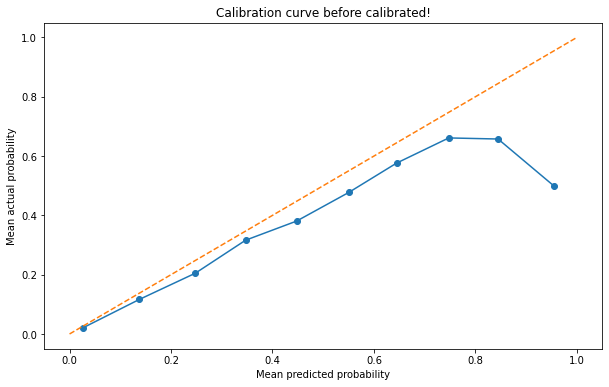

In [242]:
numeric_features = numeric_features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# categorical_features = ['embarked', 'sex', 'pclass']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
random_forest = GradientBoostingClassifier(n_estimators=500, 
                                            max_depth=7, 
                                            min_samples_split=300,
                                            min_samples_leaf=50,
                                            max_features=0.8)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(random_forest, cv=5, method='isotonic', n_jobs=8))
                      ])

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SeriousDlqin2yrs'), df['SeriousDlqin2yrs'], test_size=0.2,
                                                    random_state=0, stratify=df['SeriousDlqin2yrs'])

clf.fit(X_train, y_train)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100


print(f"AUC score: {auc}")

y_predicted = clf.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Mean actual probability')
plt.title('Calibration curve before calibrated!')
plt.show()

#### LightGBM

In [ ]:
import lightgbm

In [177]:
numeric_features = df.columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# categorical_features = ['embarked', 'sex', 'pclass']
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

prepocess = Pipeline(steps=[('preprocessor', preprocessor)])

scaled_arr = prepocess.fit_transform(df)
df = pd.DataFrame(scaled_arr, columns=df.columns)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SeriousDlqin2yrs'), df['SeriousDlqin2yrs'], shuffle=True,
                                                    test_size=0.15, stratify=df['SeriousDlqin2yrs'])
valid_size =  X_test.shape[0] / X_train.shape[0]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=valid_size, stratify=y_train, shuffle=True)

train_set = lightgbm.Dataset(X_train, y_train)
valid_set = lightgbm.Dataset(X_valid, y_valid)
test_set = lightgbm.Dataset(X_test, y_test)

params = {'objective': 'binary',
          'boosting': 'gbdt',
          'metric': ['auc', 'binary_logloss'],
          'num_leaves': 50,
          'min_data_in_leaf': 100,
          'max_depth': 5}
evals_result = {}
booster = lightgbm.train(params, train_set=train_set, valid_sets=[valid_set, train_set], evals_result=evals_result, verbose_eval=False)

[LightGBM] [Info] Number of positive: 7018, number of negative: 97982
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 105000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066838 -> initscore=-2.636306
[LightGBM] [Info] Start training from score -2.636306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

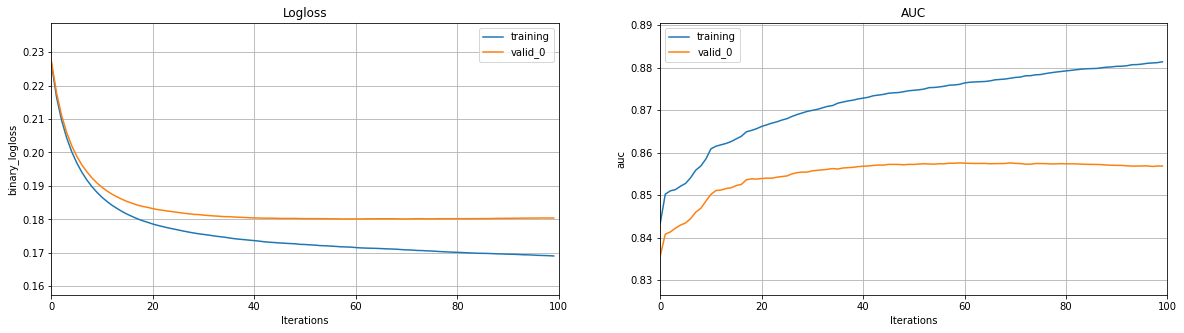

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
lightgbm.plot_metric(evals_result, metric='binary_logloss', ax=ax[0], title="Logloss")
lightgbm.plot_metric(evals_result, metric='auc', ax=ax[1], title="AUC");

In [179]:
roc_auc_score(y_test, booster.predict(X_test)) * 100

86.63598189168758

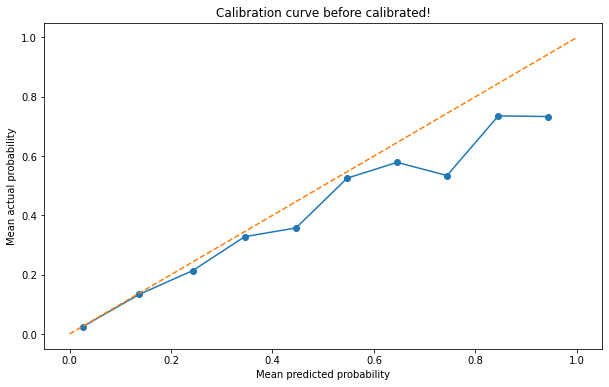

In [207]:
y_predicted = booster.predict(X_test)
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Mean actual probability')
plt.title('Calibration curve before calibrated!')
plt.show()

In [208]:
y_predicted.shape[0]*0.1

2250.0

In [209]:
def conversion_rate(y_true, y_predicted, top=0.1):
    df = pd.DataFrame({'y_true': y_true, 'y_predicted': y_predicted})
    df.sort_values('y_predicted', ascending=False, inplace=True)
    top = int(top * df.shape[0])
    
    return df.y_true.head(top).sum() / top * 100

In [211]:
conversion_rate(y_test, y_predicted, top=0.1)

36.22222222222222

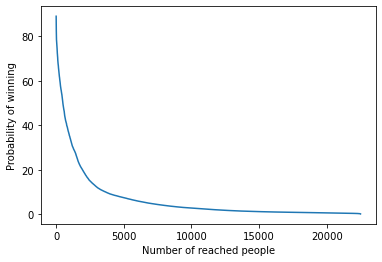

In [202]:
plt.plot(range(1, y_predicted.shape[0] + 1), sorted(y_predicted * 100, reverse=True))
plt.xlabel('Number of reached people')
plt.ylabel('Probability of winning');